<h1>Load libraries</h1>

In [62]:
import numpy
import missingno as msno

from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import concat

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
def get_columns():
	return ["pregnant", "glucose", "pressure", "triceps", "insulin", "mass", "pedigree", "age", "diabetes"]

def get_peek(df, n):
	return df.head(n)

def get_dimension(df):
	return df.shape

def get_data_types(df):
	return df.dtypes

def get_data_information(df):
	return df.info()

def get_descriptive_statistics(df, with_option=True):
	if with_option:
		run_option()
	return df.describe()

def get_correlation(df):
	return df.corr()

def get_skew(df):
	return df.skew()

def get_kurtosis(df):
    return df.kurtosis()

def get_class_distribution(df, name):
	return df.groupby(name).size()

def get_missing_value(df):
	mask = df.isnull()
	total = mask.sum()
	percent = 100 * mask.mean()
	missing_value = concat([total, percent], axis=1, join="outer", keys=["count_missing", "percentage_missing"])
	missing_value.sort_values(by="percentage_missing", ascending=False, inplace=True)
	return missing_value

def evaluate_algorithms(fold, seed, metric, X, Y, models):
	evaluation_results = []
	model_name = []
	stash_models = []
	i = 0
	while i <= len(models):
		el = models[i]
		kfold = KFold(n_splits=fold, random_state=seed, shuffle=True)
		score = cross_val_score(el[1], X, Y, cv=kfold, scoring=metric)
		evaluation_results.append(score)
		model_name.append(el[0])
		stash_models.append(el[1])
		print(f"Mean estimated Accuracy: {score.mean()*100:.3f}%")
		print(f"Estimated Standard Deviation: {score.std()*100:.3f}%")
		i += 1
		if i == len(models):
			return evaluation_results, model_name, stash_models
        
def run_option():
	set_option("display.width", 100)
	set_option("precision", 3)

def impute_missing_value(df):
	return df.fillna(0)

def missing_plot(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.matrix(df[nullable_columns].sample(500))
	show_plot()

def missing_heat_map(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.heatmap(df[nullable_columns], figsize=(18, 18))
	show_plot()
def show_density_plots(df):
	df.plot(kind="density", subplots=True, layout=(3, 3), sharex=False)
	show_plot()

def show_histogram(df):
	df.hist()
	show_plot()

def show_scatter_plot(df):
	scatter_matrix(df)
	show_plot()

def show_whisker_plots(df):
	df.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False)
	show_plot()

def show_correlation_plot(correlations, names):
	fig = pyplot.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = numpy.arange(0, 9, 1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names) 
	ax.set_yticklabels(names)
	show_plot()
    
def show_whisker_plots_for_evaluation(results, names, title):
	fig = pyplot.figure()
	fig.suptitle(title)
	ax = fig.add_subplot(111)
	pyplot.boxplot(results)
	ax.set_xticklabels(names)
	show_plot()
    
def show_plot():
	pyplot.show()

# Exploratory Data Analysis 

<h2><strong>Data Profiling </strong></h2>

In [8]:
PATH = "./pima-indians-diabetes.data.csv"
columns = get_columns()
df = read_csv(PATH, names=columns)

In [9]:
df_head = get_peek(df, 5)
df_head

pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0         6      148      72.0     35.0      0.0  33.6     0.627   50   
1         1       85      66.0     29.0      NaN  26.6     0.351   31   
2         8      183      64.0      NaN      NaN  23.3     0.672   32   
3         1       89      66.0     23.0     94.0  28.1     0.167   21   
4         0      137      40.0     35.0    168.0  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

<p> There are <strong>NaN</strong> values from this dataset. </p>

<p> Now, let's see how many <strong>instances</strong> </p>

In [10]:
df_dimension = get_dimension(df)
df_dimension

(768, 9)

<p>In this case we have <strong>768 instances and 9 features</strong><p>

<p>Let's check and verify each attributes data types. So that we would know if needed to parse the attributes to integer or float <p>
 

In [11]:
df_data_types = get_data_types(df)
df_data_types

pregnant      int64
glucose       int64
pressure    float64
triceps     float64
insulin     float64
mass        float64
pedigree    float64
age           int64
diabetes      int64
dtype: object

<p> Running the code generates a summary for each attributes with data types. So far data type transformation is not necessary. We have here <strong> 5 floating value and 4 integers. </strong></p>

In [12]:
df_info = get_data_information(df)
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  762 non-null    float64
 3   triceps   736 non-null    float64
 4   insulin   716 non-null    float64
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


<p>Dataset information generates a summary for each attributes <strong>constraint</strong> and the size is not huge.</p>

<p>Now, let's compute <strong>descriptive statistics</strong> </p>

In [13]:
df_descriptive_statistics = get_descriptive_statistics(df)
df_descriptive_statistics

pregnant  glucose  pressure  triceps  insulin     mass  pedigree      age  diabetes
count   768.000  768.000    762.00  736.000  716.000  768.000   768.000  768.000   768.000
mean      3.845  120.895     69.65   21.429   85.595   31.993     0.472   33.241     0.349
std       3.370   31.973     18.43   15.697  117.262    7.884     0.331   11.760     0.477
min       0.000    0.000      0.00    0.000    0.000    0.000     0.078   21.000     0.000
25%       1.000   99.000     64.00    0.000    0.000   27.300     0.244   24.000     0.000
50%       3.000  117.000     72.00   24.000   49.000   32.000     0.372   29.000     0.000
75%       6.000  140.250     80.00   33.000  132.750   36.600     0.626   41.000     1.000
max      17.000  199.000    122.00   99.000  846.000   67.100     2.420   81.000     1.000

<p>Interesting, the summary is not sufficient to understand the distribution. I think we need to apply <strong>imputation.</strong></p>

In [17]:
df_missing_value = get_missing_value(df)
df_missing_value

count_missing  percentage_missing
insulin              52               6.771
triceps              32               4.167
pressure              6               0.781
pregnant              0               0.000
glucose               0               0.000
mass                  0               0.000
pedigree              0               0.000
age                   0               0.000
diabetes              0               0.000

<p>We need to impute 0 value from <strong>insulin</strong> and <strong>triceps</strong> because we will be using this properties as part of the modeling.</p>

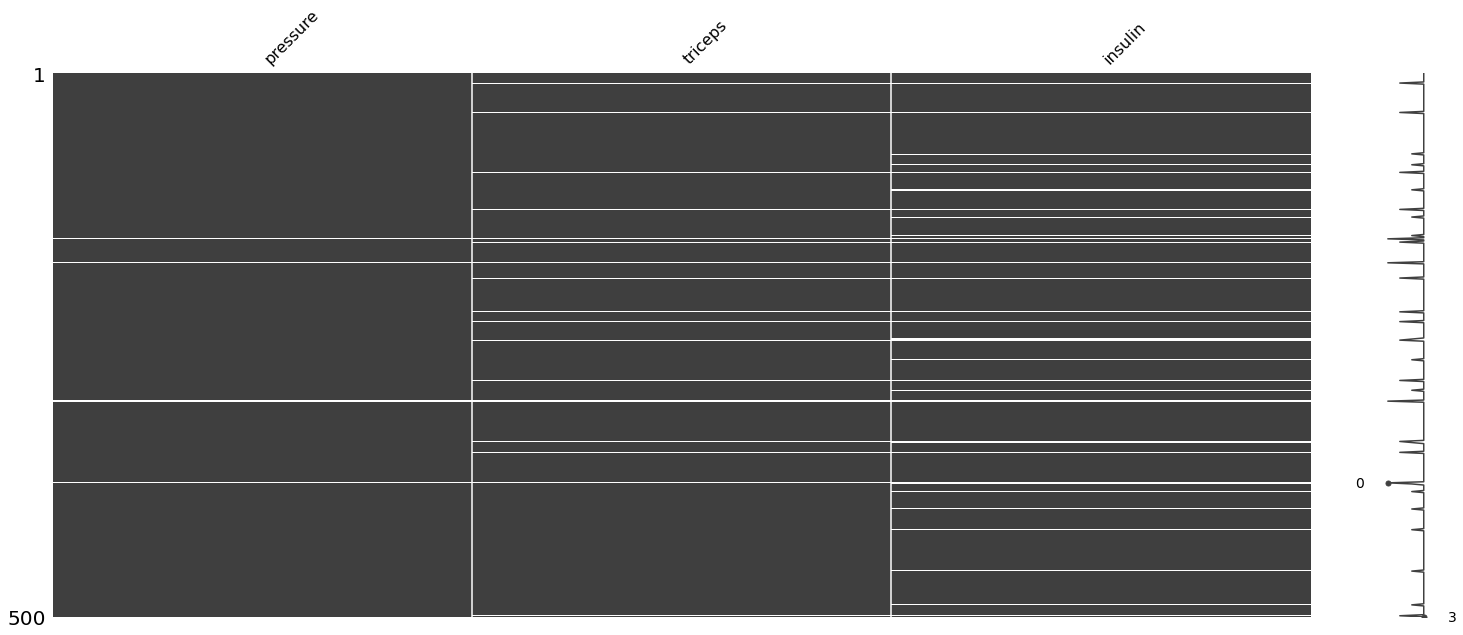

In [18]:
missing_plot(df)

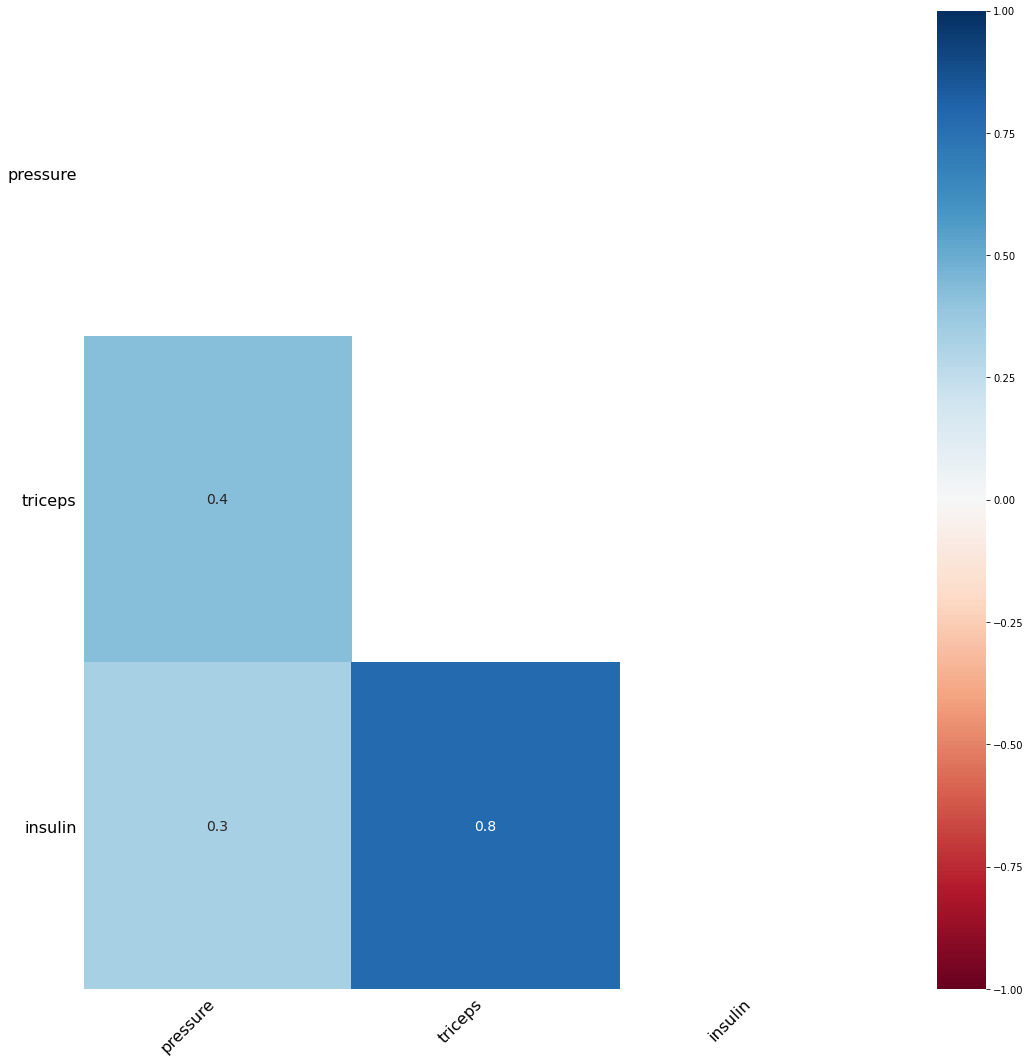

In [20]:
missing_heat_map(df)

In [21]:
df = impute_missing_value(df)

In [23]:
df_head = get_peek(df, 5)

In [24]:
df_head

pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  diabetes
0         6      148      72.0     35.0      0.0  33.6     0.627   50         1
1         1       85      66.0     29.0      0.0  26.6     0.351   31         0
2         8      183      64.0      0.0      0.0  23.3     0.672   32         1
3         1       89      66.0     23.0     94.0  28.1     0.167   21         0
4         0      137      40.0     35.0    168.0  43.1     2.288   33         1

In [25]:
get_descriptive_statistics(df)

pregnant  glucose  pressure  triceps  insulin     mass  pedigree      age  diabetes
count   768.000  768.000   768.000  768.000  768.000  768.000   768.000  768.000   768.000
mean      3.845  120.895    69.105   20.536   79.799   31.993     0.472   33.241     0.349
std       3.370   31.973    19.356   15.952  115.244    7.884     0.331   11.760     0.477
min       0.000    0.000     0.000    0.000    0.000    0.000     0.078   21.000     0.000
25%       1.000   99.000    62.000    0.000    0.000   27.300     0.244   24.000     0.000
50%       3.000  117.000    72.000   23.000   30.500   32.000     0.372   29.000     0.000
75%       6.000  140.250    80.000   32.000  127.250   36.600     0.626   41.000     1.000
max      17.000  199.000   122.000   99.000  846.000   67.100     2.420   81.000     1.000

<p>After we impute missing values, we have significant numbers between attributes.</p>

<h1><strong>Visualization</strong></h1>

<h2><strong>Univariate Plots</strong></h2>

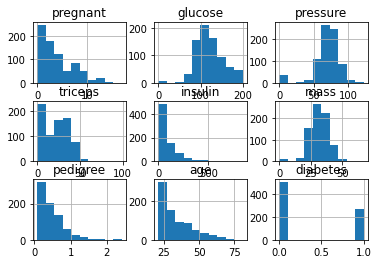

In [26]:
show_histogram(df)

<p>Interesting distributions, <strong>pregnant, pedigree, age, insulin, triceps</strong> are <strong>exponential distribution.</strong> Then <strong>glucose, pressure, diabetes</strong> are somewhat <strong>Gaussian distribution.</strong> We will see in <strong>density plots</strong> to determine each distribution using <strong>curve</strong></p>

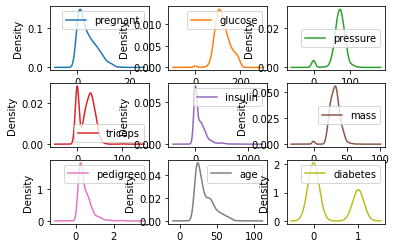

In [27]:
show_density_plots(df)

<p>Now that we have seen the distribution is not <strong>Gaussian</strong>. Instead <strong>Gamma</strong> distribution. </p>

<p>Let's check if there are any <strong>outliers</strong> on each attributes.</p>

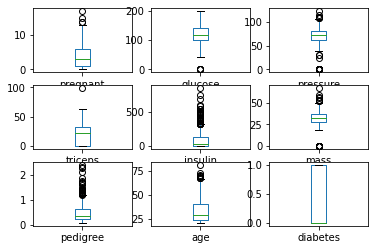

In [28]:
show_whisker_plots(df)

<p>There are outliers from<strong>pedigree, insulin, mass, pregnant, and pressure</strong></p>

<h2><strong>Multivariate Plots</strong></h2>

In [29]:
df_correlation = get_correlation(df)
df_correlation

pregnant  glucose  pressure  triceps  insulin   mass  pedigree    age  diabetes
pregnant     1.000    0.129     0.141   -0.082   -0.074  0.018    -0.034  0.544     0.222
glucose      0.129    1.000     0.153    0.057    0.331  0.221     0.137  0.264     0.467
pressure     0.141    0.153     1.000    0.207    0.089  0.282     0.041  0.240     0.065
triceps     -0.082    0.057     0.207    1.000    0.437  0.393     0.184 -0.114     0.075
insulin     -0.074    0.331     0.089    0.437    1.000  0.198     0.185 -0.042     0.131
mass         0.018    0.221     0.282    0.393    0.198  1.000     0.141  0.036     0.293
pedigree    -0.034    0.137     0.041    0.184    0.185  0.141     1.000  0.034     0.174
age          0.544    0.264     0.240   -0.114   -0.042  0.036     0.034  1.000     0.238
diabetes     0.222    0.467     0.065    0.075    0.131  0.293     0.174  0.238     1.000

<p><strong>Correlation</strong>check. How do we know if they are correlated? Base on the values if <strong> 1 it means positive correlation, 0 means no correlation, -1 negtative correlation.</strong>In this case no correlation at all. </p> 

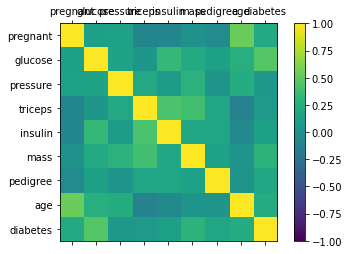

In [30]:
show_correlation_plot(df_correlation, columns)

In [31]:
df_skew = get_skew(df)
df_skew

pregnant    0.902
glucose     0.174
pressure   -1.844
triceps     0.109
insulin     2.272
mass       -0.429
pedigree    1.920
age         1.130
diabetes    0.635
dtype: float64

<p>Skew results </p>

In [32]:
df_kurtosis = get_kurtosis(df)
df_kurtosis

pregnant    0.159
glucose     0.641
pressure    5.180
triceps    -0.520
insulin     7.214
mass        3.290
pedigree    5.595
age         0.643
diabetes   -1.601
dtype: float64

<p>Let's see if how attributes pair change to one another</p>

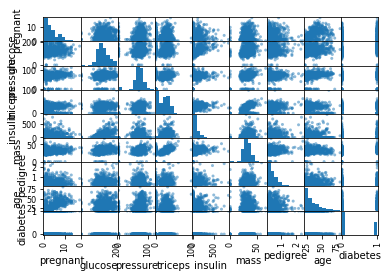

In [33]:
show_scatter_plot(df)

<h2><strong>Target Variables </strong></h2>

<p>Let's see and verify what <strong>type</strong> of <strong>classification</strong> problem is this.</p>


In [37]:
df_class_distribution = get_class_distribution(df, "diabetes")
df_class_distribution

diabetes
0    500
1    268
dtype: int64

<p>In our case this is <strong> binary classification</strong> problem because there are only <strong> two possobile outcomes 0 means negative in diabetes whilst 1 means positive in diabetes.</strong></p>

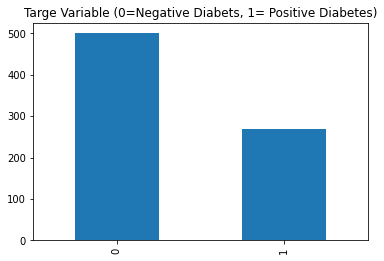

In [36]:
df["diabetes"].value_counts().plot(kind="bar")
pyplot.title("Targe Variable (0=Negative Diabets, 1= Positive Diabetes)")
show_plot()

<p>This is worth investigating how categorical values being distributed. In our case <strong>positive diabetes are just 290</strong> while <strong>negative diabetes 490</strong></p>

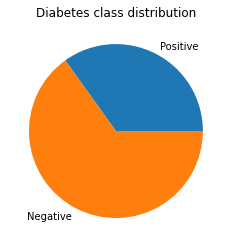

In [38]:
positive = df_class_distribution.iloc[1]
negative = df_class_distribution.iloc[0]
pyplot.title("Diabetes class distribution")
pyplot.pie([positive, negative], labels=["Positive", "Negative"])
show_plot()

<p>About <strong>70%</strong> of our dataset are being classified as <strong>negative in diabetes</strong> then remaining <strong>30%</strong> are <strong>positive in diabetes.</strong></p>

<h1>Prepare Data</h1>

In [41]:
n_array = df.values
X = n_array[:, 0: 8]
Y = n_array[:, 8]

In [44]:
X # Column 1 to 7 

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [45]:
Y # Last column (Diabetes)

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [46]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=7)

<h1>Evaluate Algorithms (KNN, CART) </h1>

In [47]:
split = 10
scoring = "accuracy"
random_seed = 7
is_shuffe = True

In [49]:
models = [("KNN", KNeighborsClassifier()), ("CART", DecisionTreeClassifier())]

In [55]:
model_results, model_name, stash_models = evaluate_algorithms(split, random_seed, scoring, X_train, Y_train, models)

Mean estimated Accuracy: 71.021%
Estimated Standard Deviation: 4.977%
Mean estimated Accuracy: 67.618%
Estimated Standard Deviation: 4.930%


<p> In our case <strong>KNN gave us 71% of accuracy</strong> and <strong>CART 67% of accuracy </strong> which means KNN is worth investing time in training the model. Let's see how the mean accuracy and standard deviation distributed.</p>

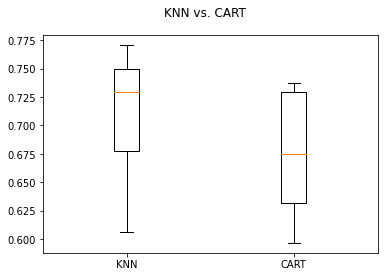

In [56]:
show_whisker_plots_for_evaluation(model_results, model_name, "KNN vs. CART")

<h1>Prediction</h1>

In [60]:
knn_fit = stash_models[0]
knn_fit.fit(X_train, Y_train)
knn_predictions = knn_fit.predict(X_validation)
print(f"KNN Prediction Accuracy: {accuracy_score(Y_validation, knn_predictions) * 100:.2f}%")

KNN Prediction Accuracy: 70.78%


In [61]:
cart_fit = stash_models[1]
cart_fit.fit(X_train, Y_train)
cart_predictions = cart_fit.predict(X_validation)
print(f"CART Prediction Accuracy: {accuracy_score(Y_validation, cart_predictions) * 100:.2f}%")


CART Prediction Accuracy: 75.97%


<p>I thought <strong>KNN</strong> will perform well on prediction but <strong>CART</strong> does. Let's see the <strong>Confusion Matrix and Classification Report.</strong></p>

In [63]:
knn_confusion_matrix = confusion_matrix(Y_validation, knn_predictions)
print(f"KNN Confusion Matrix: {knn_confusion_matrix}")

KNN Confusion Matrix: [[82 15]
 [30 27]]


<p>Although the array was printed without the headings those values are the majority of prediction fall in diagonal line.</p>

In [64]:
cart_confusion_matrix = confusion_matrix(Y_validation, cart_predictions)
print(f"CART Confusion Matrix: {cart_confusion_matrix}")

CART Confusion Matrix: [[81 16]
 [21 36]]


In [65]:
knn_classification_report = classification_report(Y_validation, knn_predictions)
print(f"KNN Classification Report: {knn_classification_report}")

KNN Classification Report:               precision    recall  f1-score   support

         0.0       0.73      0.85      0.78        97
         1.0       0.64      0.47      0.55        57

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [66]:
cart_classification_report = classification_report(Y_validation, cart_predictions)
print(f"CART Classification Report: {cart_classification_report}")

CART Classification Report:               precision    recall  f1-score   support

         0.0       0.79      0.84      0.81        97
         1.0       0.69      0.63      0.66        57

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



<p><strong>Classification Report</strong> provides a convenient way to generate a report about this classification problem.</p>

<p>Next steps would be <strong>improve results</strong>.</p>